Gestational diabetes Mellitus

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import joblib

Load the Dataset 

In [2]:
data = pd.read_csv("gestational_diabetes.csv")

In [3]:
data.head()

,GDM,AP,ICP,TD,Eclampsia,Twins,Day,Age,ALT,AST,...,TBA,UREA,CREA,UA,BMG,A1MG,CysC,CO2,FPG,BMI
0,0,0,0,0,0,0,119,29,12.900000,18.300000,...,2.500000,2.940000,50.50000,211.100000,1.340000,21.050000,0.700000,24.000000,5.410000,38.021780
1,0,0,0,0,0,0,165,30,19.267422,20.341909,...,1.593159,2.689873,67.27318,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,36.471451
2,0,0,0,0,0,0,85,35,16.800000,14.400000,...,1.600000,2.580000,50.50000,189.200000,0.870000,18.420000,0.500000,24.800000,5.290000,52.455713
3,0,0,0,0,0,0,134,36,19.267422,20.341909,...,1.593159,2.689873,67.27318,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,49.184689
4,0,0,0,0,0,0,77,32,11.900000,16.200000,...,1.300000,1.980000,43.90000,188.600000,0.840000,18.310000,0.600000,20.900000,5.100000,35.396311


In [4]:
features = [
    "AP",
    "ICP",
    "TD",
    "Eclampsia",
    "Twins",
    "Day",
    "Age",
    "BMI",
    "ALT",
    "AST",
    "GGT",
    "ALP",
    "TP",
    "ALB",
    "TBIL",
    "DBIL",
    "TBA",
    "UREA",
    "CREA",
    "UA",
    "BMG",
    "A1MG",
    "CysC",
    "CO2",
    "FPG",
]

X = data[features]

# Fit the scaler on training data
scaler = StandardScaler()
scaler.fit(X)

# Save the fitted scaler
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Data cleaning 

In [5]:
X = data.drop(columns=["GDM"])  # Assuming 'GDM' is the target column
y = data["GDM"]

Number of Columns and rows in the dataset 

In [6]:
data.shape

(5700, 26)

Getting the stastical measures of the data 

In [7]:
data.describe()

,GDM,AP,ICP,TD,Eclampsia,Twins,Day,Age,ALT,AST,...,TBA,UREA,CREA,UA,BMG,A1MG,CysC,CO2,FPG,BMI
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,...,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,0.217719,0.006316,0.003158,0.008070,0.010877,0.019649,109.962632,30.093333,19.743378,20.434154,...,1.599224,2.691891,77.136003,223.582438,0.956633,19.847517,0.642055,24.238442,4.778737,37.842019
std,0.412732,0.079228,0.056111,0.091419,0.103734,0.138804,39.261339,4.238510,16.723825,8.777143,...,0.980101,0.544986,384.626181,37.925837,0.103748,2.458765,0.069266,1.374203,0.395585,11.696839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.600000,8.300000,...,0.000000,1.050000,18.600000,93.700000,0.150000,0.720000,0.300000,15.600000,2.840000,17.638597
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,27.000000,12.000000,16.700000,...,1.400000,2.420000,41.200000,213.975000,0.952367,19.626514,0.640272,24.238095,4.630000,27.900273
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,30.000000,19.267422,20.341909,...,1.593159,2.689873,54.250000,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,37.861396
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,32.000000,21.100000,20.765597,...,1.621019,2.790000,67.273180,235.697195,0.971961,20.641597,0.648459,24.238539,4.980000,47.938886
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,167.000000,47.000000,310.700000,194.400000,...,24.700000,8.140000,12024.100000,550.500000,2.510000,48.730000,1.700000,33.000000,11.950000,58.042632


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building the model

In [10]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
# Step 5: Train the model
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=75,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7781 - loss: 0.5442 - val_accuracy: 0.7917 - val_loss: 0.4430
Epoch 2/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.3970 - val_accuracy: 0.8366 - val_loss: 0.3928
Epoch 3/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3963 - val_accuracy: 0.8443 - val_loss: 0.3799
Epoch 4/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3536 - val_accuracy: 0.8531 - val_loss: 0.3640
Epoch 5/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3486 - val_accuracy: 0.8673 - val_loss: 0.3557
Epoch 6/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.3088 - val_accuracy: 0.8706 - val_loss: 0.3453
Epoch 7/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.3147 - val_accuracy: 0.8783 - val_loss: 0.3351
Epoch 8/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8842 - loss: 0.3021 - val_accuracy: 0.

In [13]:
# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8850 - loss: 0.3059 
Test Accuracy: 0.8781


In [14]:
import matplotlib.pyplot as plt

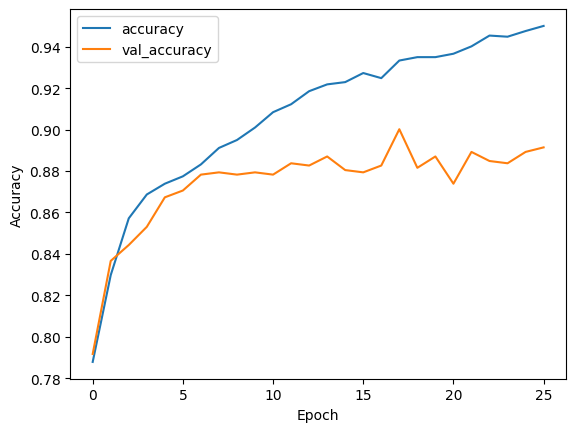

In [15]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

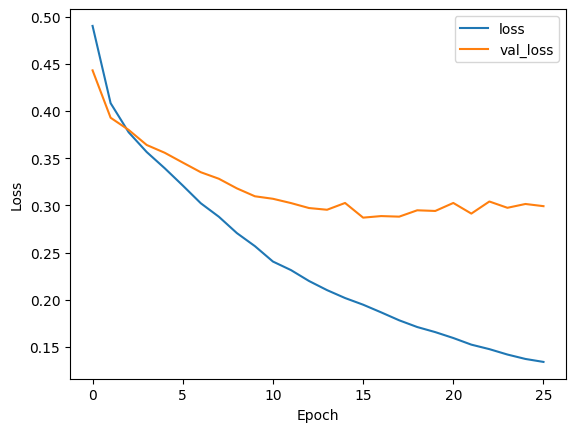

In [16]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
# After training the model, save it to a file
model.save("gdm_model.h5")